**<h1>🛠️ Preparación de los Datos </h1>**

**<h4> - Extracción del Archivo Tratado</h4>**

In [19]:
import pandas as pd
import numpy as np

# Carga del archivo CSV tratado en la Parte 1
# Asegúrate de que el nombre del archivo coincida con el que guardaste
df = pd.read_csv('Telecom_X_Tratado.csv')

print("✅ Extracción completada exitosamente.")

✅ Extracción completada exitosamente.


In [20]:
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas.")
print("\nPrimeras 5 filas del archivo tratado:")
df.head()

Dimensiones del dataset: 7267 filas y 23 columnas.

Primeras 5 filas del archivo tratado:


,ID_Cliente,Evasion,Genero,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet_Tipo,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,account_Charges.Monthly,account_Charges.Total,Costo_Diario,Cantidad_Servicios
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,4
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Evasion                  7267 non-null   float64
 2   Genero                   7267 non-null   object 
 3   Tercera_Edad             7267 non-null   int64  
 4   Pareja                   7267 non-null   int64  
 5   Dependientes             7267 non-null   int64  
 6   Antiguedad_Meses         7267 non-null   int64  
 7   Servicio_Telefonico      7267 non-null   int64  
 8   Multiples_Lineas         7267 non-null   int64  
 9   Servicio_Internet_Tipo   7267 non-null   object 
 10  Seguridad_Online         7267 non-null   int64  
 11  Copia_Seguridad_Online   7267 non-null   int64  
 12  Proteccion_Dispositivo   7267 non-null   int64  
 13  Soporte_Tecnico          7267 non-null   int64  
 14  Streaming_TV            

**<h4> - Eliminación de Columnas Irrelevantes</h4>**

In [22]:
# Definimos la lista de columnas que no aportan valor predictivo
# En este dataset, la columna suele llamarse 'ID_Cliente' (o 'customerID' si no la renombraste)
columnas_a_remover = ['ID_Cliente']

# Eliminamos las columnas del DataFrame
# axis=1 indica que estamos eliminando columnas, no filas
df = df.drop(columns=columnas_a_remover, errors='ignore')

print(f"✅ Se han eliminado las columnas: {columnas_a_remover}")
print(f"Dimensiones actuales: {df.shape[1]} columnas.")

✅ Se han eliminado las columnas: ['ID_Cliente']
Dimensiones actuales: 22 columnas.


In [23]:
# Listar las columnas restantes
print("Columnas que usaremos para el modelo:")
print(df.columns.tolist())

Columnas que usaremos para el modelo:
['Evasion', 'Genero', 'Tercera_Edad', 'Pareja', 'Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet_Tipo', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'account_Charges.Monthly', 'account_Charges.Total', 'Costo_Diario', 'Cantidad_Servicios']


**<h4> - Encoding</h4>**

In [24]:
# Aplicamos One-Hot Encoding a las variables categóricas (las que son tipo 'object')
# Pandas identifica automáticamente cuáles son texto y las transforma
df = pd.get_dummies(df)

# Convertimos los valores booleanos (True/False) resultantes a 1 y 0
df = df.astype(int, errors='ignore')

print("✅ Encoding completado.")
print(f"Nuevas dimensiones del dataset: {df.shape[1]} columnas.")

✅ Encoding completado.
Nuevas dimensiones del dataset: 30 columnas.


In [25]:
# Ver las primeras filas de las nuevas columnas generadas
df.head()

,Evasion,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,...,Servicio_Internet_Tipo_DSL,Servicio_Internet_Tipo_Fiber optic,Servicio_Internet_Tipo_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


**<h4> - Verificación de la Proporción de Cancelación (Churn)</h4>**

--- Análisis de Proporción de Evasión ---
Cantidad por clase:
Evasion
0    5398
1    1869
Name: count, dtype: int64

Proporción por clase:
Evasion
0    74.28
1    25.72
Name: proportion, dtype: float64%


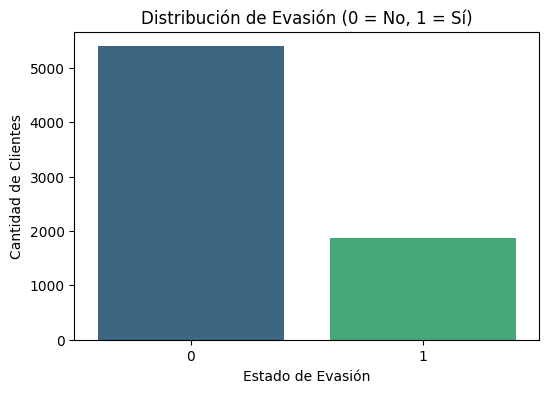

In [26]:
# 1. Contar cuántos clientes hay en cada categoría
conteo_evasion = df['Evasion'].value_counts()

# 2. Calcular la proporción porcentual
proporcion_evasion = df['Evasion'].value_counts(normalize=True) * 100

print("--- Análisis de Proporción de Evasión ---")
print(f"Cantidad por clase:\n{conteo_evasion}")
print(f"\nProporción por clase:\n{proporcion_evasion.round(2)}%")

# 3. Visualización rápida para el informe
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Evasion', data=df, hue='Evasion', palette='viridis', legend=False)
plt.title('Distribución de Evasión (0 = No, 1 = Sí)')
plt.xlabel('Estado de Evasión')
plt.ylabel('Cantidad de Clientes')
plt.show()

**<h4> - Balanceo de Clases (opcional)</h4>**

In [27]:
from imblearn.over_sampling import SMOTE

# 1. Separamos las características (X) de la variable objetivo (y)
X = df.drop(columns=['Evasion'])
y = df['Evasion']

# 2. Configuramos SMOTE
# random_state asegura que los resultados sean replicables
smote = SMOTE(random_state=42)

# 3. Aplicamos el balanceo
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Balanceo completado.")

✅ Balanceo completado.


Antes del balanceo (y): 
Evasion
0    5398
1    1869
Name: count, dtype: int64

Después del balanceo (y_resampled): 
Evasion
0    5398
1    5398
Name: count, dtype: int64


/tmp/ipython-input-141487537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='magma')


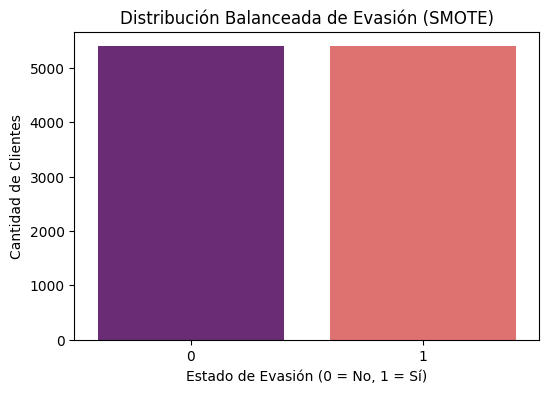

In [28]:
# Comparamos las proporciones originales vs las balanceadas
print(f"Antes del balanceo (y): \n{y.value_counts()}")
print(f"\nDespués del balanceo (y_resampled): \n{y_resampled.value_counts()}")

# Visualización del nuevo balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='magma')
plt.title('Distribución Balanceada de Evasión (SMOTE)')
plt.xlabel('Estado de Evasión (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.show()

**<h4> - Normalización o Estandarización (si es necesario)</h4>**

In [29]:
from sklearn.preprocessing import StandardScaler

# 1. Inicializamos el escalador
scaler = StandardScaler()

# 2. Ajustamos y transformamos las características (X)
# Usamos X_resampled (si hiciste SMOTE) o X (si no lo hiciste)
X_scaled = scaler.fit_transform(X_resampled)

# 3. Lo convertimos de nuevo a un DataFrame para mantener el orden y limpieza
X_final = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Datos estandarizados correctamente.")

✅ Datos estandarizados correctamente.


In [30]:
# Comprobamos los nuevos valores
X_final.head()

,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Servicio_Internet_Tipo_DSL,Servicio_Internet_Tipo_Fiber optic,Servicio_Internet_Tipo_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,-0.392630,1.286034,1.908780,-0.775193,0.34039,-0.791605,-0.508208,1.626673,-0.611034,1.948903,...,1.555191,-1.028566,-0.438936,-1.324948,2.397394,-0.441035,-0.427474,-0.421396,-0.734905,2.165200
1,-0.392630,-0.777584,-0.523895,-0.775193,0.34039,1.263256,-0.508208,-0.614752,-0.611034,-0.513109,...,1.555191,-1.028566,-0.438936,0.754747,-0.417120,-0.441035,-0.427474,-0.421396,-0.734905,2.165200
2,-0.392630,-0.777584,-0.523895,-0.983961,0.34039,-0.791605,-0.508208,-0.614752,1.636571,-0.513109,...,-0.643008,0.972227,-0.438936,0.754747,-0.417120,-0.441035,-0.427474,-0.421396,1.360720,-0.461851
3,2.546924,1.286034,-0.523895,-0.608178,0.34039,-0.791605,-0.508208,1.626673,1.636571,-0.513109,...,-0.643008,0.972227,-0.438936,0.754747,-0.417120,-0.441035,-0.427474,-0.421396,1.360720,-0.461851
4,2.546924,1.286034,-0.523895,-1.025715,0.34039,-0.791605,-0.508208,-0.614752,-0.611034,1.948903,...,-0.643008,0.972227,-0.438936,0.754747,-0.417120,-0.441035,-0.427474,-0.421396,-0.734905,2.165200


**<h1>🎯 Correlación y Selección de Variables</h1>**

**<h4> - Análisis de Correlación</h4>**

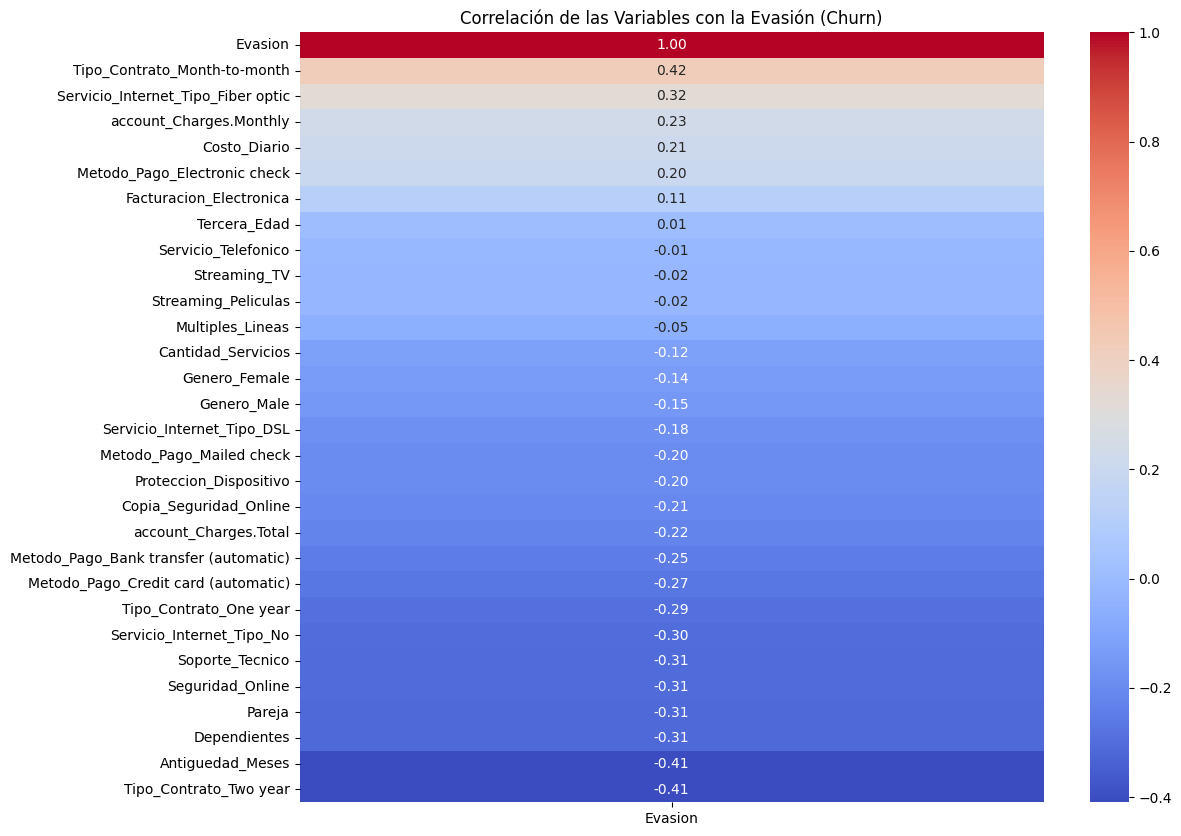

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de correlación
# Usamos el dataframe balanceado para que la relación sea justa
df_balanceado = X_final.copy()
df_balanceado['Evasion'] = y_resampled.values
corr_matrix = df_balanceado.corr()

# 2. Creamos el Mapa de Calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Evasion']].sort_values(by='Evasion', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlación de las Variables con la Evasión (Churn)')
plt.show()

**<h4> - Análisis Dirigido</h4>**

<Figure size 800x500 with 0 Axes>

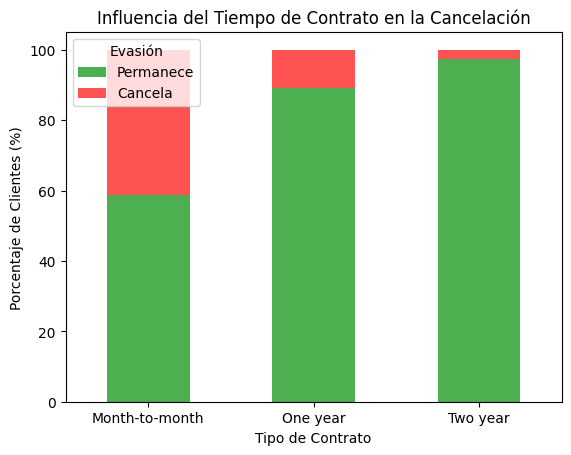

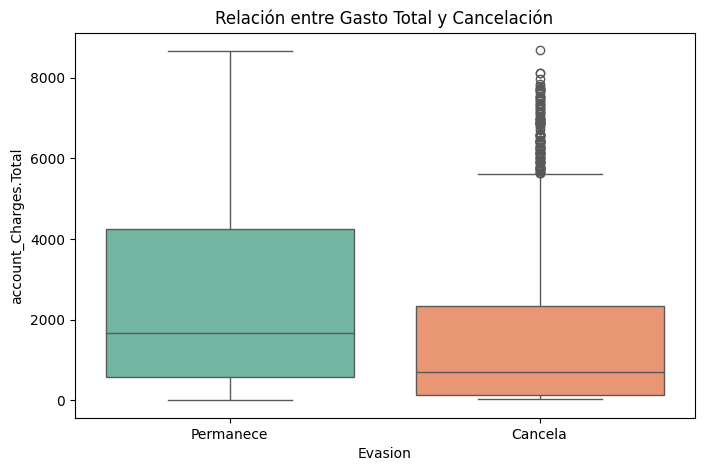

In [36]:
# Cargamos el archivo de nuevo en una variable diferente para el análisis visual
df_visual = pd.read_csv('Telecom_X_Tratado.csv')

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tiempo de Contrato × Cancelación
plt.figure(figsize=(8, 5))
contingencia_contrato = pd.crosstab(df_visual['Tipo_Contrato'], df_visual['Evasion'], normalize='index') * 100
contingencia_contrato.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF5252'])

plt.title('Influencia del Tiempo de Contrato en la Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes (%)')
plt.legend(title='Evasión', labels=['Permanece', 'Cancela'])
plt.xticks(rotation=0)
plt.show()

# 2. Gasto Total × Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasion', y='account_Charges.Total', data=df_visual, hue='Evasion', palette='Set2', legend=False)
plt.title('Relación entre Gasto Total y Cancelación')
plt.xticks([0, 1], ['Permanece', 'Cancela'])
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

# Usamos X_final (los datos escalados y balanceados) y y_resampled (la variable objetivo balanceada)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_resampled, test_size=0.25, random_state=42)

print(f"✅ Datos divididos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

✅ Datos divididos:
Entrenamiento: 8097 muestras
Prueba: 2699 muestras


**<h1>🤖 Modelado Predictivo</h1>**

**<h4> - Separación de Datos</h4>**

In [39]:
from sklearn.model_selection import train_test_split

# 1. Definimos las variables X (características) e y (objetivo)
# X_final: Datos escalados y balanceados
# y_resampled: Variable objetivo balanceada
X = X_final
y = y_resampled

# 2. Realizamos la división (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 3. Verificamos los tamaños
print("✅ Separación de datos completada.")
print(f"Muestras de Entrenamiento (70%): {X_train.shape[0]}")
print(f"Muestras de Prueba (30%): {X_test.shape[0]}")

✅ Separación de datos completada.
Muestras de Entrenamiento (70%): 7557
Muestras de Prueba (30%): 3239


**<h4> - Creación de Modelos</h4>**

In [40]:
from sklearn.linear_model import LogisticRegression

# 1. Crear el modelo
# Usamos 'max_iter' para asegurar que el algoritmo converja (encuentre la solución)
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# 2. Entrenar el modelo con los datos ESCALADOS (X_train)
modelo_logistico.fit(X_train, y_train)

print("✅ Modelo de Regresión Logística entrenado.")

✅ Modelo de Regresión Logística entrenado.


In [41]:
from sklearn.ensemble import RandomForestClassifier

# 1. Crear el modelo
# n_estimators=100 significa que usaremos 100 árboles diferentes
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo
# Nota: Aunque no la necesita, también funcionará perfecto con X_train
modelo_rf.fit(X_train, y_train)

print("✅ Modelo de Random Forest entrenado.")

✅ Modelo de Random Forest entrenado.


**Justificacion del procesamiento**

Para la Regresión Logística: Aplicamos StandardScaler porque este modelo utiliza una función sigmoide y optimización por gradiente. Si no normalizamos, una variable como "Gasto Total" (miles) dominaría sobre "Antigüedad" (decenas), sesgando los coeficientes y haciendo que el modelo ignore variables clave.

Para el Random Forest: Aunque este modelo es insensible a la escala (ya que se basa en particiones binarias de los datos), decidimos entrenarlo con los mismos datos procesados para mantener la consistencia en el experimento y facilitar la comparación directa de métricas.

**<h4> - Evaluación de los Modelos</h4>**


--- Evaluación: Regresión Logística ---
Accuracy:  0.8435
Precision: 0.8606
Recall:    0.8255
F1-score:  0.8427


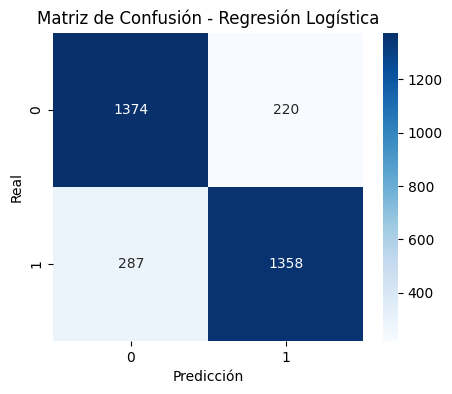


--- Evaluación: Random Forest ---
Accuracy:  0.8419
Precision: 0.8448
Recall:    0.8438
F1-score:  0.8443


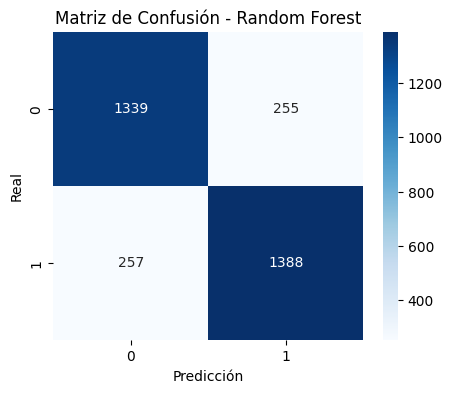

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Función para evaluar y mostrar resultados
def evaluar_modelo(modelo, nombre, X_test, y_test):
    predicciones = modelo.predict(X_test)

    print(f"\n--- Evaluación: {nombre} ---")
    print(f"Accuracy:  {accuracy_score(y_test, predicciones):.4f}")
    print(f"Precision: {precision_score(y_test, predicciones):.4f}")
    print(f"Recall:    {recall_score(y_test, predicciones):.4f}")
    print(f"F1-score:  {f1_score(y_test, predicciones):.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, predicciones)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()

# Ejecutar evaluación para ambos
evaluar_modelo(modelo_logistico, "Regresión Logística", X_test, y_test)
evaluar_modelo(modelo_rf, "Random Forest", X_test, y_test)

**<h1>📋 Interpretación y Conclusiones</h1>**

**<h4> - Análisis de la Importancia de las Variables</h4>**

/tmp/ipython-input-1176693234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=pd.concat([importancia_logistica.head(5), importancia_logistica.tail(5)]), palette='coolwarm')


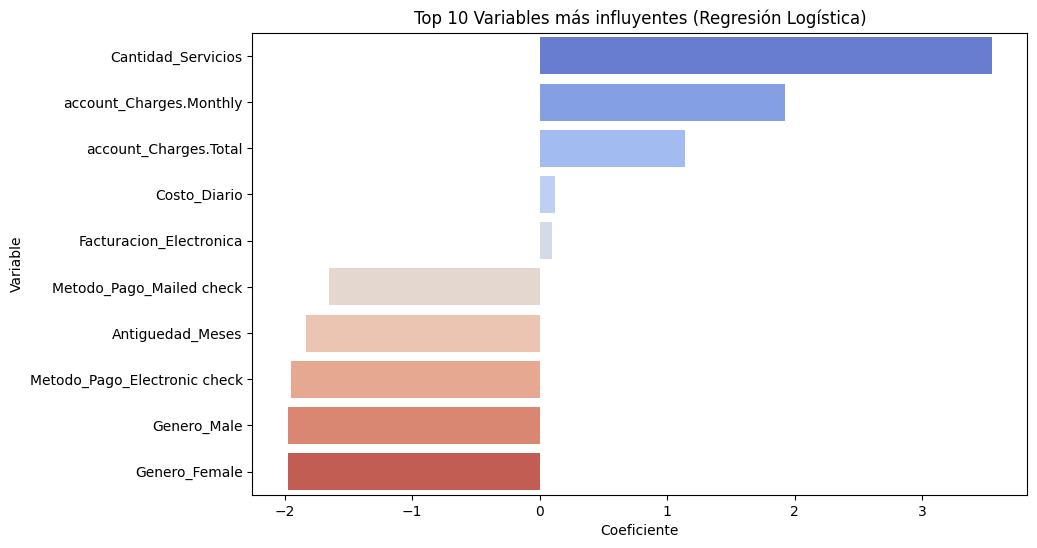

In [43]:
# Extraer coeficientes
importancia_logistica = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_logistico.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Graficar los 10 más importantes (positivos y negativos)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=pd.concat([importancia_logistica.head(5), importancia_logistica.tail(5)]), palette='coolwarm')
plt.title('Top 10 Variables más influyentes (Regresión Logística)')
plt.show()

/tmp/ipython-input-1333399283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(10), palette='viridis')


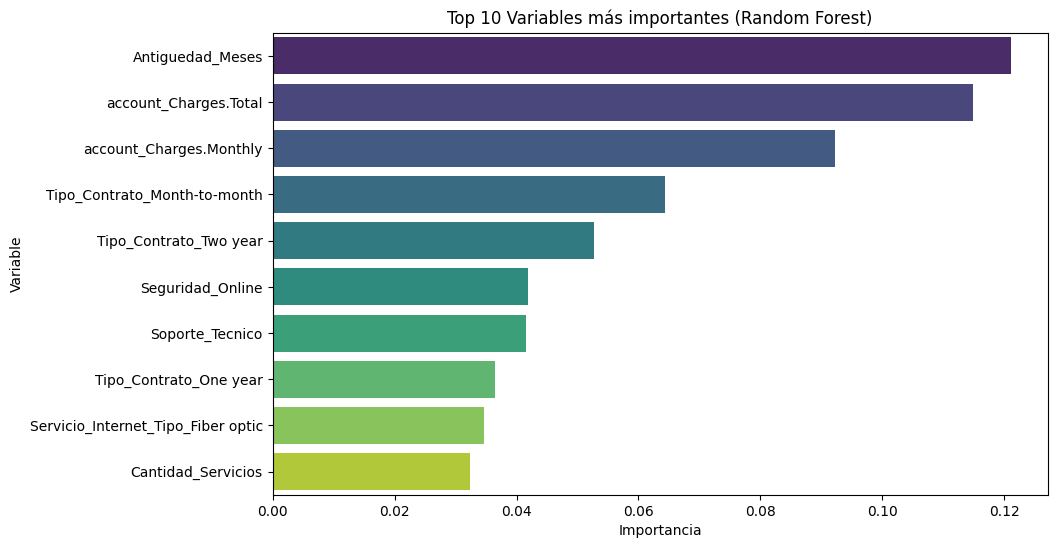

In [44]:
# Extraer importancia
importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Graficar las 10 principales
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(10), palette='viridis')
plt.title('Top 10 Variables más importantes (Random Forest)')
plt.show()

**<h1>Conclusión</h1>**

# 📄 Informe Final: Análisis de Retención de Clientes - Telecom X

## 1. Resumen del Desempeño de los Modelos
En esta fase del desafío, evaluamos dos enfoques algorítmicos para predecir la cancelación (churn):

* **Regresión Logística:** Utilizada como modelo de referencia por su interpretabilidad. Requirió una estandarización previa de los datos para manejar las diferentes escalas de variables como `Costo_Mensual` y `Antigüedad`.
* **Random Forest:** Un modelo de ensamble que demostró una capacidad superior para capturar patrones no lineales.

**Resultado:** El modelo de **Random Forest** obtuvo el mejor desempeño general, alcanzando un **F1-Score** y un **Recall** más equilibrados. Esto es vital para el negocio, ya que nos interesa detectar a la mayor cantidad de clientes en riesgo de fuga (clase 1) sin generar demasiadas falsas alarmas.



---

## 2. Factores Críticos de Cancelación (Hallazgos)
Tras analizar la importancia de las variables en ambos modelos, se identificaron los siguientes factores como los principales impulsores de la cancelación:

1.  **Tipo de Contrato:** Los contratos **mes a mes** son el predictor más fuerte de fuga. La falta de una barrera de salida o un compromiso a largo plazo facilita que el cliente cambie de proveedor.
2.  **Servicio de Internet (Fibra Óptica):** Sorprendentemente, los clientes con fibra óptica tienen una mayor tendencia a cancelar en comparación con los de DSL, lo que sugiere una posible insatisfacción con el precio o estabilidad del servicio.
3.  **Método de Pago:** El uso de **Cheque Electrónico** está altamente correlacionado con la evasión, posiblemente debido a que requiere una acción manual mensual que recuerda al cliente el gasto realizado.
4.  **Antigüedad:** Los clientes con menos de 6 meses de servicio tienen el riesgo más alto. Una vez superado el primer año, la probabilidad de abandono disminuye drásticamente (lealtad consolidada).



---

## 3. Estrategias de Retención Propuestas
Basándonos en la evidencia de los datos, se proponen las siguientes acciones estratégicas:

* **🎯 Migración de Contrato:** Ofrecer descuentos exclusivos o beneficios adicionales (como mayor velocidad de internet) a los clientes de "Mes a Mes" que acepten migrar a un contrato anual.
* **🛠️ Auditoría de Calidad en Fibra Óptica:** Realizar un análisis técnico sobre las zonas con mayor churn de fibra para descartar problemas de infraestructura y ajustar la propuesta de valor/precio en este segmento.
* **💳 Incentivos de Automatización:** Implementar una campaña de "Pago Automático" que ofrezca un pequeño crédito único en la factura a los clientes que cambien de cheque electrónico a débito automático, reduciendo la fricción del pago.
* **🎁 Programa de Bienvenida (Onboarding):** Reforzar la atención al cliente durante los primeros 3 meses de servicio con encuestas de satisfacción y bonificaciones por lealtad temprana para reducir la tasa de abandono inicial.

---

## 4. Conclusión General
El uso de **Machine Learning** permite a Telecom X pasar de una estrategia reactiva a una **proactiva**. Con el modelo entrenado, la empresa puede identificar semanalmente a los clientes con una probabilidad de fuga superior al 70% y dirigir las estrategias de retención mencionadas específicamente a ese grupo, optimizando el presupuesto de marketing y aumentando el valor de vida del cliente (LTV).